# Alessandro's Data Analysis and Exploration on MCF7 SMARTS

In [1]:
#initial imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import sklearn.feature_selection as fs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
unfiltered_mcf7_smarts = pd.read_csv("data/smartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep = " ")
meta__mcf7_smarts = pd.read_table("data/smartSeq/MCF7_SmartS_MetaData.tsv")

In [7]:
unfiltered_mcf7_smarts.head()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH9P,1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MTND1P23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In the first part of data analysis we take a look at the dataset.



In [8]:
unfiltered_mcf7_smarts.shape

(22934, 383)

The columns of the MCF7 SmartSeq dataset represent the different cells from the cell line. They are 383 in total.

The rows of the MCF7 SmartSeq dataset represent the different genes present in each cell and in what quantity. They are 22934 in total.

## Cleaning the data

### Cheking for null entries

In [9]:
print(unfiltered_mcf7_smarts.isnull().sum())
print(f"\nColumns with null data: {unfiltered_mcf7_smarts.columns[unfiltered_mcf7_smarts.isnull().any()].to_list()}")

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      0
                                                           ..
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    0
Length: 383, dtype: int64

Columns with null data: []


So we can clearly see that there is no null data in the dataset.

### Checking for outliers

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

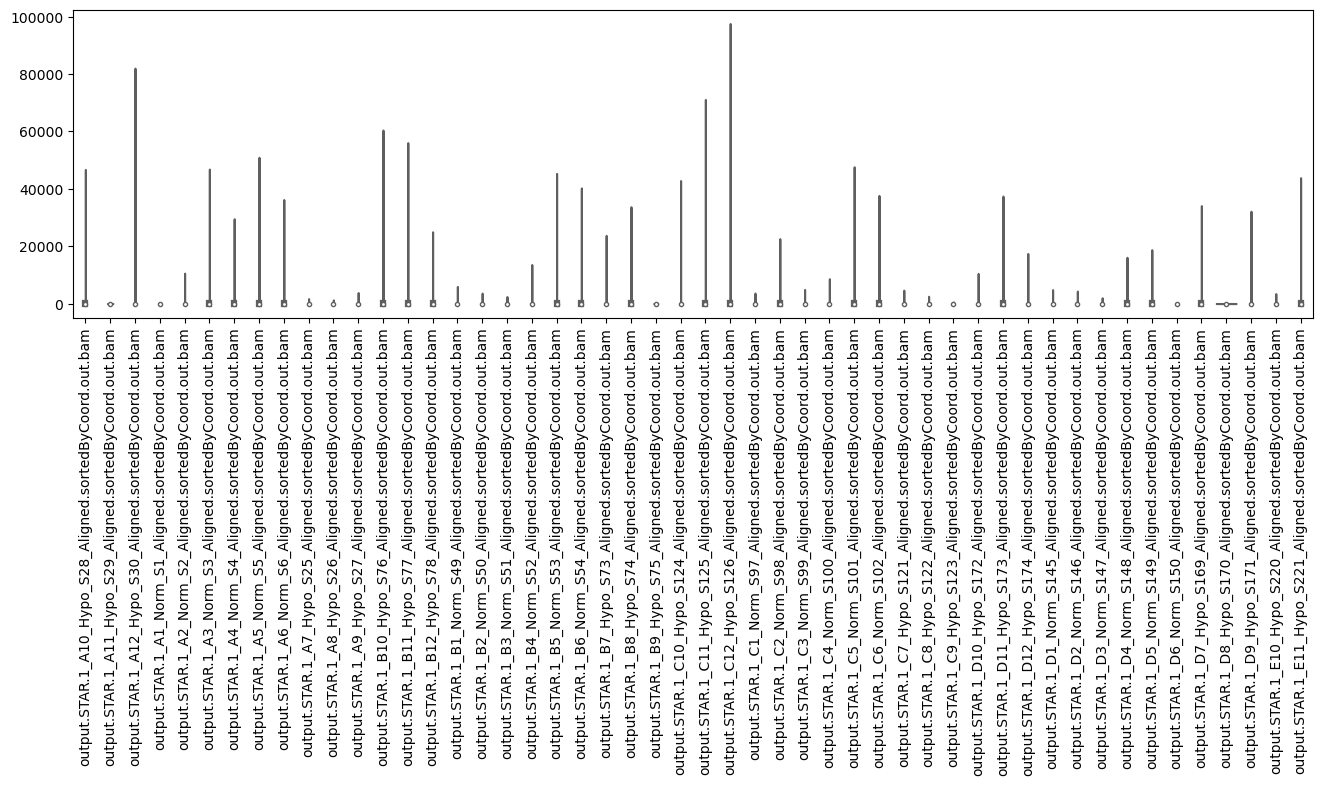

In [10]:
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=unfiltered_mcf7_smarts.iloc[:, :50],palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

***Delete this part since it has no sense for sparse matrices***

In [11]:
Q1 = unfiltered_mcf7_smarts.quantile(0.25)
Q3 = unfiltered_mcf7_smarts.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    17.0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam     0.0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam     5.0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam       0.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam       7.0
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam     9.0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    27.0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    30.0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    38.0
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    33.0
Length: 383, dtype: float64


In [13]:
mcf7_smarts_noOut = unfiltered_mcf7_smarts[~((unfiltered_mcf7_smarts < (Q1 - 1.5 * IQR)) |(unfiltered_mcf7_smarts > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mcf7_smarts_noOut.shape)
mcf7_smarts_noOut.head(3)

(6435, 383)


,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CICP3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM87B,0,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


Creating a metrics in order to calculate sparsity

In [14]:
from fix_data import calc_sparsity

In [15]:
calc_sparsity(unfiltered_mcf7_smarts.to_numpy())

0.6021531646834907

This explains that about 60% of the data in MCF7 SmartSeq dataset is zero (i.e. only 40% is non-zero).

Hence we have to find other methods to handle this sparsity.

### Drop genes with lowest variance

In [16]:
from fix_data import add_label_T

transposed_mcf7_df = add_label_T(unfiltered_mcf7_smarts)
transposed_mcf7_df.reset_index(drop=True)

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,label
0,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
3,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
4,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,0,0,0,0,1,0,0,49,...,0,1,341,46,1,570,0,0,0,1
379,0,0,1,0,0,2,5,5,0,370,...,0,2,1612,215,6,3477,3,7,6,1
380,1,0,1,0,0,7,0,0,0,33,...,0,0,62,20,0,349,0,2,0,0
381,0,0,4,1,0,29,4,0,0,228,...,0,2,1934,575,7,2184,2,28,1,0


In [17]:
target = transposed_mcf7_df['label']
transposed_mcf7_df.drop(["label"], axis=1, inplace=True)

In [18]:
# Instantiate VarianceThreshold object
threshold = 0.05
selector = fs.VarianceThreshold(threshold)

# Fit selector to DataFrame
selector.fit(transposed_mcf7_df)

# Get boolean mask of features that meet threshold
mask = selector.get_support()

# Get list of column names that meet threshold
near_zero_var_cols = transposed_mcf7_df.columns[~mask].tolist()

# Print the result
print(f'Columns with < {threshold} variance: {near_zero_var_cols}')
print(f"In total: {len(near_zero_var_cols)}")
var_fixed = transposed_mcf7_df.drop(near_zero_var_cols, axis=1)
var_fixed

Columns with < 0.05 variance: ['OR4F16', 'CICP3', 'MIR429', 'LINC01786', 'MIR6726', 'MIR6808', 'MMP23A', 'CALML6', 'CAMTA1-AS1', 'RERE-AS1', 'RPL23AP19', 'RNU6-37P', 'ANGPTL7', 'MIR6729', 'SNORA59A', 'MIR6730', 'HNRNPCL1', 'HNRNPCL2', 'CROCCP4', 'DYNLL1P3', 'RNU6-1099P', 'PPP1R11P1', 'CDC42-IT1', 'PPIAP34', 'MIR3115', 'BTBD6P1', 'LIN28A', 'DHDDS-AS1', 'RPL12P13', 'FABP3', 'LINC01226', 'CSMD2', 'EFCAB14P1', 'UBE2V2P4', 'FTH1P1', 'RNU6-510P', 'SNORA55', 'OAZ1P1', 'MKRN8P', 'RNU5F-1', 'RPS15AP11', 'BTBD19', 'RNU5E-6P', 'OSTCP5', 'CYP4X1', 'CYP4Z1', 'CYP4A22', 'AGBL4-AS1', 'LINC01562', 'RNU6-1281P', 'GAPDHP51', 'ANAPC10P1', 'SHISAL2A', 'RNU2-30P', 'PCSK9', 'GYG1P3', 'RPS26P15', 'PHBP3', 'RNU6-414P', 'LAMTOR5P1', 'CFL1P3', 'ROR1-AS1', 'MIR3671', 'MIR101-1', 'RPS29P7', 'IL12RB2', 'PIN1P1', 'SNORD45A', 'SNORD45B', 'RN7SL370P', 'NSRP1P1', 'ADH5P2', 'LINC01781', 'RPL7P10', 'HNRNPA3P14', 'ARID3BP1', 'LINC01362', 'TXN2P1', 'SAMD13', 'CLCA4-AS1', 'CLCA3P', 'PHKA1P1', 'RPL5P6', 'FEN1P1', 'SETSIP', 

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,1,0,0,44,8,0,66,0,1,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,1,0,0,49,...,0,0,1,341,46,1,570,0,0,0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,5,5,0,370,...,0,0,2,1612,215,6,3477,3,7,6
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1,0,1,0,0,7,0,0,0,33,...,0,0,0,62,20,0,349,0,2,0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,0,0,4,1,0,29,4,0,0,228,...,3,0,2,1934,575,7,2184,2,28,1


In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(var_fixed)
scaled_df = pd.DataFrame(scaled_features, index=var_fixed.index, columns=var_fixed.columns)
scaled_df['label'] = target
scaled_df

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,label
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.153750,-0.174420,-0.216779,-0.563946,-0.430791,-0.535747,-0.245538,-0.736081,...,-0.407438,-0.738586,-0.507355,-0.261235,-0.158178,-0.721728,-0.618575,-0.083536,1.606804,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.599858,-0.174420,-0.216779,-0.828641,-0.752102,-0.535747,-0.245538,-0.846653,...,0.510496,-0.738586,-1.007292,-0.927921,-0.760985,-0.813959,-0.618575,-0.750081,-0.449690,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.599858,-0.174420,-0.216779,-0.696293,-0.591446,0.485104,-0.245538,-0.800899,...,-0.407438,-0.738586,-1.007292,-0.927921,-0.760985,-0.788244,-0.618575,-0.750081,-0.449690,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.599858,-0.174420,-0.216779,-0.828641,-0.752102,-0.535747,-0.245538,-0.819963,...,-0.407438,-0.738586,-0.964639,-0.891639,-0.760985,-0.791673,-0.618575,-0.616772,-0.449690,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.599858,-0.174420,-0.216779,-0.828641,-0.752102,-0.535747,-0.245538,-0.587382,...,-0.407438,-0.738586,-0.773195,-0.787327,-0.308880,-0.565037,-0.618575,-0.750081,-0.449690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.599858,-0.174420,-0.216779,-0.828641,-0.591446,-0.535747,-0.245538,-0.659825,...,-0.407438,-0.503832,-0.670033,-0.719298,-0.610283,-0.618868,-0.618575,-0.750081,-0.449690,1
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,-0.153750,-0.174420,-0.216779,-0.563946,0.051175,4.568507,-0.245538,0.564087,...,-0.407438,-0.269078,0.590722,0.047165,0.143226,0.377849,0.272080,0.183082,1.092680,1
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1.402981,-0.104875,-0.153750,-0.174420,-0.216779,0.097792,-0.752102,-0.535747,-0.245538,-0.720830,...,-0.407438,-0.738586,-0.946784,-0.837215,-0.760985,-0.694641,-0.618575,-0.483463,-0.449690,0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,-0.215518,-0.104875,1.184573,3.006661,-0.216779,3.009437,-0.109481,-0.535747,-0.245538,0.022668,...,-0.407438,-0.269078,0.910126,1.679866,0.293927,-0.065479,-0.024805,2.982572,-0.192629,0


In [20]:
target = scaled_df['label']
scaled_df.drop(['label'], axis=1, inplace=True)

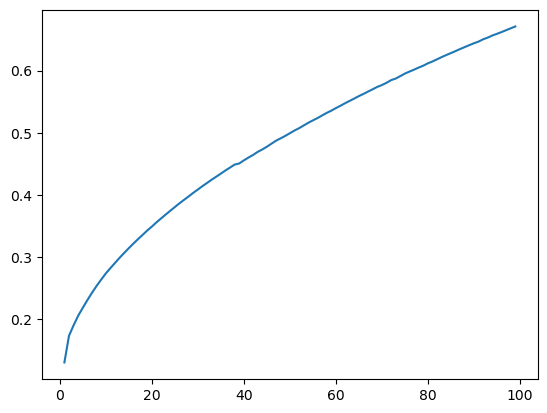

In [21]:
accuracies = []
for i in range(1,100):
    pca = PCA(n_components=i)
    pca.fit_transform(scaled_df)
    accuracies.append(sum(pca.explained_variance_ratio_))

plt.plot([i for i in range(1,100)], accuracies)

Here above we plotted the variance explained (y-axis) by the number of components chosen by PCA (x-axis)

### Transform the data